In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
# Load the dataset
data = pd.read_csv("TSLA.csv")

Preprocess the data:

Convert the 'Date' column to datetime format.

Split the dataset into a training and testing set.

Normalize the data using MinMaxScaler.

In [4]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Split the dataset into training and testing sets
train_data = data[data['Date'] < '2021-01-01']
test_data = data[data['Date'] >= '2021-01-01']

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data['Close'].values.reshape(-1, 1))

Prepare the input and output data for the RNN model

In [5]:
# Prepare the input and output data for the RNN model
X_train = []
y_train = []

for i in range(60, len(train_data_scaled)):
    X_train.append(train_data_scaled[i-60:i, 0])
    y_train.append(train_data_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float().unsqueeze(1)

Build the RNN model using LSTM layers

In [6]:
# Build the RNN model using LSTM layers
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

        out, _ = self.lstm(x, (h0, c0))
        out = self.dropout(out[:, -1, :])
        out = self.fc(out)
        return out

Train the RNN model

In [7]:
input_size = 1
hidden_size = 50
num_layers = 1
output_size = 1

model = RNNModel(input_size, hidden_size, num_layers, output_size)

In [8]:
# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the RNN model
num_epochs = 100
batch_size = 32

In [9]:
for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i+batch_size]
        labels = y_train[i:i+batch_size]

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/100], Loss: 0.5526
Epoch [2/100], Loss: 0.4817
Epoch [3/100], Loss: 0.3500
Epoch [4/100], Loss: 0.0549
Epoch [5/100], Loss: 0.2393
Epoch [6/100], Loss: 0.0306
Epoch [7/100], Loss: 0.0240
Epoch [8/100], Loss: 0.3329
Epoch [9/100], Loss: 0.2489
Epoch [10/100], Loss: 0.1293
Epoch [11/100], Loss: 0.0129
Epoch [12/100], Loss: 0.0161
Epoch [13/100], Loss: 0.0934
Epoch [14/100], Loss: 0.0088
Epoch [15/100], Loss: 0.0168
Epoch [16/100], Loss: 0.0101
Epoch [17/100], Loss: 0.0125
Epoch [18/100], Loss: 0.0294
Epoch [19/100], Loss: 0.0169
Epoch [20/100], Loss: 0.0529
Epoch [21/100], Loss: 0.0092
Epoch [22/100], Loss: 0.0138
Epoch [23/100], Loss: 0.0083
Epoch [24/100], Loss: 0.0207
Epoch [25/100], Loss: 0.0180
Epoch [26/100], Loss: 0.0379
Epoch [27/100], Loss: 0.0092
Epoch [28/100], Loss: 0.0263
Epoch [29/100], Loss: 0.0123
Epoch [30/100], Loss: 0.0435
Epoch [31/100], Loss: 0.0142
Epoch [32/100], Loss: 0.0275
Epoch [33/100], Loss: 0.0122
Epoch [34/100], Loss: 0.0331
Epoch [35/100], Loss: 0

Prepare the test data and make predictions

In [10]:
# Prepare the test data
total_data = pd.concat((train_data['Close'], test_data['Close']), axis=0)
inputs = total_data[len(total_data) - len(test_data) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test = torch.tensor(X_test).float()

# Make predictions
model.eval()
with torch.no_grad():
    predicted_stock_price = model(X_test)
    predicted_stock_price = scaler.inverse_transform(predicted_stock_price.detach().numpy())


Visualize the results

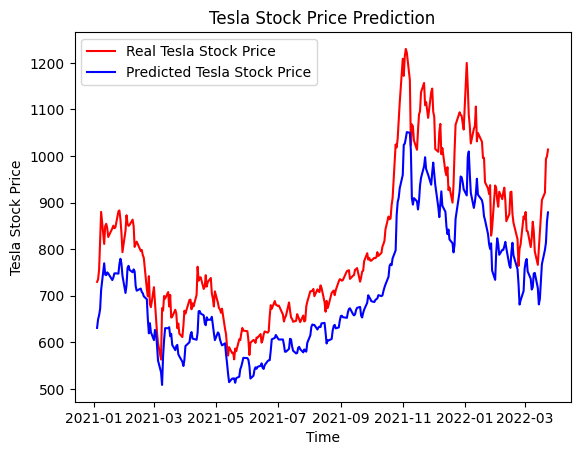

In [11]:
# Visualize the results
plt.plot(test_data['Date'], test_data['Close'], color='red', label='Real Tesla Stock Price')
plt.plot(test_data['Date'], predicted_stock_price, color='blue', label='Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

**To achieve the best performance, you can experiment with different RNN variants such as LSTM and GRU, as well as adjust hyperparameters.**

Replace the LSTM layers with GRU layers in the RNN model:

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [13]:
class RNNModel(nn.Module):
    def __init__(self):
        super(RNNModel, self).__init__()
        self.gru1 = nn.GRU(input_size=1, hidden_size=50, batch_first=True)
        self.dropout1 = nn.Dropout(0.2)
        self.gru2 = nn.GRU(input_size=50, hidden_size=50, batch_first=True)
        self.dropout2 = nn.Dropout(0.2)
        self.gru3 = nn.GRU(input_size=50, hidden_size=50, batch_first=True)
        self.dropout3 = nn.Dropout(0.2)
        self.gru4 = nn.GRU(input_size=50, hidden_size=50, batch_first=True)
        self.dropout4 = nn.Dropout(0.2)
        self.fc = nn.Linear(50, 1)

    def forward(self, x):
        x, _ = self.gru1(x)
        x = self.dropout1(x)
        x, _ = self.gru2(x)
        x = self.dropout2(x)
        x, _ = self.gru3(x)
        x = self.dropout3(x)
        x, _ = self.gru4(x)
        x = self.dropout4(x)
        x = self.fc(x[:, -1])
        return x

model = RNNModel()


Prepare the data as PyTorch tensors and create data loaders

In [14]:
train_data = torch.tensor(X_train, dtype=torch.float32)
train_labels = torch.tensor(y_train, dtype=torch.float32)
test_data = torch.tensor(X_test, dtype=torch.float32)

train_dataset = TensorDataset(train_data, train_labels)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


<ipython-input-14-3d89a92e4573>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_data = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-14-3d89a92e4573>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels = torch.tensor(y_train, dtype=torch.float32)
<ipython-input-14-3d89a92e4573>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_data = torch.tensor(X_test, dtype=torch.float32)


Train the RNN model using PyTorch

In [15]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(100):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([27, 1])) that is different to the input size (torch.Size([27])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Make predictions using the trained model

In [16]:
model.eval()
with torch.no_grad():
    predicted_stock_price = model(test_data).numpy()
    predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


Visualize the results

In [22]:
import pandas as pd

# Assuming you have already loaded the dataset
data['Date'] = pd.to_datetime(data['Date']).astype(int) // 10**9  # Convert to UNIX timestamp

In [23]:
import torch
from sklearn.model_selection import train_test_split

# Assuming 'data' is the DataFrame containing the entire dataset
# Split the dataset into training and testing sets (adjust the test_size and random_state as needed)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Select the input features and target variable as tensors (assuming 'Close' is the target variable)
train_X = torch.tensor(train_data.drop(columns=['Close']).values, dtype=torch.float)
train_y = torch.tensor(train_data['Close'].values, dtype=torch.float)
test_X = torch.tensor(test_data.drop(columns=['Close']).values, dtype=torch.float)
test_y = torch.tensor(test_data['Close'].values, dtype=torch.float)


In [24]:
# Assuming you have already loaded the dataset and split it into training and testing sets
original_test_data = test_data[['Date', 'Close']]
original_test_data['Date'] = pd.to_datetime(original_test_data['Date'], unit='s')  # Convert back to datetime


<ipython-input-24-71bd918d4771>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_test_data['Date'] = pd.to_datetime(original_test_data['Date'], unit='s')  # Convert back to datetime


In [ ]:
# Truncate the original_test_data to match the length of predicted_stock_price
original_test_data = original_test_data.iloc[:len(predicted_stock_price)]

# Visualize the results
plt.plot(original_test_data['Date'], original_test_data['Close'], color='red', label='Real Tesla Stock Price')
plt.plot(original_test_data['Date'], predicted_stock_price, color='blue', label='Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()


**implementing and comparing univariate and multivariate models**

In [29]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [30]:
# Load your dataset
data = pd.read_csv('TSLA.csv')

# For demonstration purposes, let's create a synthetic dataset
dates = pd.date_range(start='2020-01-01', end='2020-12-31', freq='D')
data = pd.DataFrame(np.random.rand(len(dates), 3), index=dates, columns=['Open', 'High', 'Low'])

In [31]:
# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Normalize the data
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Prepare the univariate data (using 'Open' prices)
X_train_univariate = train_data[:, 0].reshape(-1, 1)
X_test_univariate = test_data[:, 0].reshape(-1, 1)

# Prepare the multivariate data (using all features)
X_train_multivariate = train_data
X_test_multivariate = test_data

In [32]:
# Reshape the data for LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back)])
        Y.append(data[i + look_back])
    return np.array(X), np.array(Y)

In [33]:
look_back = 1
X_train_uni, y_train_uni = create_dataset(X_train_univariate, look_back)
X_test_uni, y_test_uni = create_dataset(X_test_univariate, look_back)
X_train_multi, y_train_multi = create_dataset(X_train_multivariate, look_back)
X_test_multi, y_test_multi = create_dataset(X_test_multivariate, look_back)

In [34]:
# Build the univariate model
univariate_model = Sequential()
univariate_model.add(LSTM(units=50, input_shape=(look_back, 1)))
univariate_model.add(Dense(units=1))
univariate_model.compile(optimizer='adam', loss='mean_squared_error')

In [35]:
# Build the multivariate model
multivariate_model = Sequential()
multivariate_model.add(LSTM(units=50, input_shape=(look_back, 3)))
multivariate_model.add(Dense(units=3))
multivariate_model.compile(optimizer='adam', loss='mean_squared_error')

In [36]:
# Train and evaluate both models
univariate_model.fit(X_train_uni, y_train_uni, epochs=10, batch_size=16, verbose=0)
multivariate_model.fit(X_train_multi, y_train_multi, epochs=10, batch_size=16, verbose=0)

In [37]:
uni_predictions = univariate_model.predict(X_test_uni)
multi_predictions = multivariate_model.predict(X_test_multi)

3/3 [==============================] - 0s 4ms/step


Evaluate the performance of the model

MAE, MSE, R2 score

In [38]:
from sklearn.metrics import mean_absolute_error, r2_score

uni_mse = mean_squared_error(y_test_uni, uni_predictions)
multi_mse = mean_squared_error(y_test_multi, multi_predictions)

uni_mae = mean_absolute_error(y_test_uni, uni_predictions)
multi_mae = mean_absolute_error(y_test_multi, multi_predictions)

uni_r2 = r2_score(y_test_uni, uni_predictions)
multi_r2 = r2_score(y_test_multi, multi_predictions)


In [39]:
print("Univariate model MSE:", uni_mse)
print("Multivariate model MSE:", multi_mse)

print("\nUnivariate model MAE:", uni_mae)
print("Multivariate model MAE:", multi_mae)

print("\nUnivariate model R2 score:", uni_r2)
print("Multivariate model R2 score:", multi_r2)


Univariate model MSE: 0.10338477930385376
Multivariate model MSE: 0.09161577983006854

Univariate model MAE: 0.27238289396551985
Multivariate model MAE: 0.25634234222006613

Univariate model R2 score: -0.1831739569606865
Multivariate model R2 score: -0.06089173000176514


In [40]:
def plot_stock_prices(y_actual, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.plot(y_actual, label='Actual Stock Prices')
    plt.plot(y_pred, label='Predicted Stock Prices')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized Stock Prices')
    plt.legend()
    plt.show()


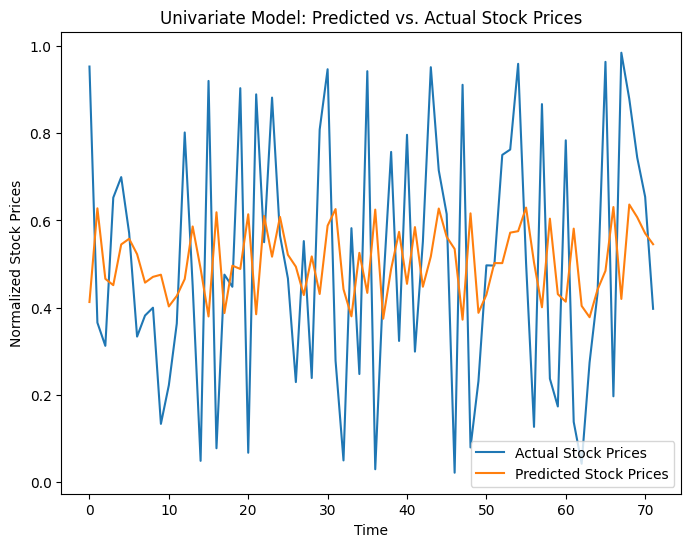

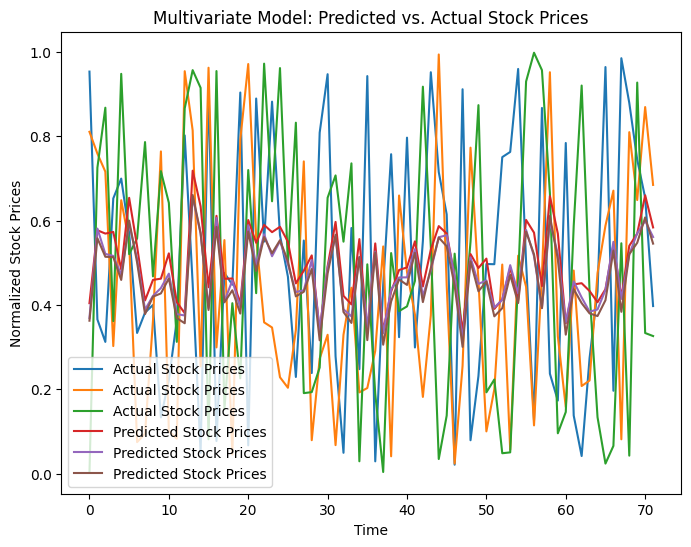

In [41]:
# Univariate model
plot_stock_prices(y_test_uni, uni_predictions, 'Univariate Model: Predicted vs. Actual Stock Prices')

# Multivariate model
plot_stock_prices(y_test_multi, multi_predictions, 'Multivariate Model: Predicted vs. Actual Stock Prices')
